# Постановка задачи

Задача теплопроводности на отрезке $[0, 1]$:
$$
\begin{cases}
\frac{\partial u}{\partial t} = \mu \frac{\partial^2 u}{\partial x^2}, x \in [0, 1], t \in [0, T] \\
u(x, 0) = u_0(x),  x \in [0, 1] \\
u(0, t) = \varphi_1(t), t \in [0, T] \\
u(1, t) = \varphi_2(t), t \in [0, T] \\
\end{cases}
$$

Цель - определить $u(x, T)$.

# Программа

Начальные условия $u_0(x)$

In [1]:
def u0(x):
	return 1.0 - (x-0.5)**2

Граничные условия $\varphi_1(x)$, $\varphi_2(x)$

In [2]:
def phi1(t):
	return 0.0
def phi2(t):
	return 0.0

Параметры задачи: $\mu$ - коэффициент теплопроводности, $T$ - время искомого распределения температуры

In [3]:
mu = 0.1
T = 1.0

Сетка по пространству

In [4]:
n = 10
h = 1.0 / n
x = [i * h for i in range(0, n + 1)]

Сетка по времени

In [5]:
m = 50
tau = T / m
t = [k * tau for k in range(0, m + 1)]

Условие устойчивости

In [6]:
r = 2 * mu * tau / h / h
print(tau, h, r)

0.02 0.1 0.39999999999999997


Инициализация начального слоя

In [7]:
y = [u0(x[i]) for i in range(0, n + 1)]
for i in range(0, n + 1):
	y[i] = u0(x[i])

Счет

In [8]:
ynew = [0] * (n + 1)
for k in range(0, m):
	y[0] = phi1(t[k])
	y[n] = phi2(t[k])
	for i in range(1, n):
		ynew[i] = y[i] + tau * mu / h / h * (y[i+1] - 2 * y[i] + y[i-1])
	y = list(ynew)

Вывод

In [9]:
print(x)
print(y)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
[0, 0.1385966315820913, 0.2636046188318708, 0.36278347445281206, 0.4264422136560791, 0.44837368574758446, 0.4264422136560791, 0.36278347445281206, 0.2636046188318708, 0.1385966315820913, 0]


# Графика

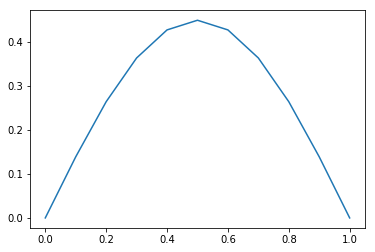

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
lines = plt.plot(x, y)